<a href="https://colab.research.google.com/github/arezookhalilinasr22/Probability_Statistics/blob/master/Exercise_Se02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># Exercise Se02_01

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


import sys, os
import random 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils



In [51]:
data = pd.read_csv('job_change.csv')
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### Data Dict

    Education
    1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor'

    EnvironmentSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    JobInvolvement
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    JobSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    PerformanceRating
    1 'Low'
    2 'Good'
    3 'Excellent'
    4 'Outstanding'

    RelationshipSatisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

    WorkLifeBalance
    1 'Bad'
    2 'Good'
    3 'Better'
    4 'Best'

In [52]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


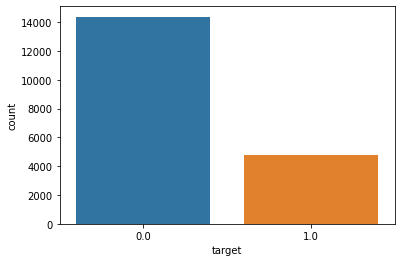

In [53]:
sns.countplot(data.target)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

> ## **Categorical Encoding Practice**

1. Identify categorical and  numerics features for categories. Use "sklearn.compose.make_column_selector" and pandas separatly 
2. Identify Ordinal and nominals
3. Encode Categorical features for all data. Try:
    - Scikit Ordinal Encoder (for ordinals) and Label Encoder (for Nominals)
    - Pandas dummy and Scikit Onehot Encoder
    - Split data to train and test (85-15)and use labelencoder to encode categories
    - Apply Hash encoding to the whole dataset
    - Apply Frequency encoding to the whole dataset
    

In [55]:

from sklearn.compose import make_column_selector
ct_sk = make_column_selector( dtype_include='object')
print('categorical', ct_sk(data))


categorical ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [56]:
categorical_pd = data.select_dtypes(include="object")

In [57]:
categorical_pd

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [58]:
np.int 
int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


int

In [59]:
Ordinals = ["experience", "company_size", "last_new_job"]
Nominals = ["city", "gender", "relevent_experience", "enrolled_university","education_level", "major_discipline", "company_type"]

In [60]:
from sklearn.preprocessing import LabelEncoder    
from sklearn.preprocessing import OrdinalEncoder

In [61]:
ord_enc = OrdinalEncoder()
p = ord_enc.fit_transform(data[Ordinals])
print(p)

[[21. nan  0.]
 [ 6.  4.  4.]
 [15. nan  5.]
 ...
 [21.  4.  3.]
 [20.  5.  1.]
 [11. nan  0.]]


In [62]:
lable_enc = LabelEncoder()
#q = lable_enc.fit_transform(data[Nominals])          
#print(q)
res_LE = []
for c in Nominals:
  res_LE.append(lable_enc.fit_transform(data[c]))
res_LE = pd.DataFrame(res_LE)

In [63]:
#pd.get_dummies(df['type'])
dummy_enc = pd.get_dummies(categorical_pd)

In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#data_1 = ohe.fit_transform(data[categorical_pd])
#data_1 = data_1.toarray()
#data_2 = pd.DataFrame(data_1, columns=ohe.get_feature_names_out())


#data_1 = ohe.fit_transform(data)
#data_2 = pd.DataFrame(data_1.toarray(), columns=ohe.get_feature_names_out(), dtype=int)

ohe = OneHotEncoder()
multiple_enc = ohe.fit_transform(categorical_pd)
multiple_enc = multiple_enc.toarray()
multiple_enc = pd.DataFrame(multiple_enc, columns = ohe.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
df =pd.read_csv('/content/hp_train2 (1).csv') 
print(df)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [69]:
print(df.head(10))


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...  

In [74]:
print(df.tail(10))

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1450  1451          90         60.0     9000            5            5   
1451  1452          20         78.0     9262            8            5   
1452  1453         180         35.0     3675            5            5   
1453  1454          20         90.0    17217            5            5   
1454  1455          20         62.0     7500            7            5   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1450       1974          1974         0.0           0  ...          32   
1451       2008          2009       1

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf